# Full example

We use data from www.ssa.gov 

Let's take a look at the data

In [3]:
import pandas as pd
names1880 = pd.read_csv('data/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


Now let's calculate the number of births per year. Each file contains a set of all baby born of a year. 

In [20]:
years = range(1880,2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'data/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = yearein DataFrame
    pieces.append(frame)

# Concatenate everything into single DataFrame
names = pd.concat(pieces, ignore_index=True)
names.head(20)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


Now we group the list by year and gender.

In [12]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum, margins=True)
total_births.tail()

sex,F,M,All
year,,,
2007,1921053,2073784,3994837
2008,1889069,2038194,3927263
2009,1835062,1981481,3816543
2010,1775345,1916476,3691821
All,160078035,162532320,322610355


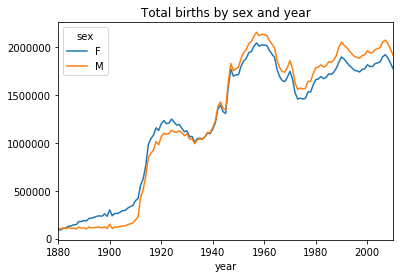

In [11]:
total_births.plot(title='Total births by sex and year')

![title](img/pivot-table-datasheet.png)

Next, we add a column of prop with the proportion of babies in each name.

In [34]:
def add_prop(group):
    #Integer division floats
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

grouped = names.groupby(['year', 'sex']).apply(add_prop)
grouped.sort_values(by=['prop']).tail()

,name,sex,births,year,prop
2939,William,M,8524,1881,0.084611
7116,John,M,8894,1883,0.085008
943,William,M,9532,1880,0.086270
2938,John,M,8769,1881,0.087043
942,John,M,9655,1880,0.087383


group_by = split - apply - combine (siehe Seite 262)

In [35]:
grouped_by_sex = names.groupby(['sex'])

In [36]:
grouped_by_sex.mean()

,births,year
sex,,
F,159.330456,1970.351162
M,236.438160,1968.188090


You can iterate over a groupby

In [37]:
for name, group in names.groupby('sex'):
    print(name)
    print(group)

F
              name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1677849     Zylynn   F       5  2010
1677850     Zyniya   F       5  2010
1677851    Zyonnah   F       5  2010
1677852    Zyriana   F       5  2010
1677853  Zyrihanna   F       5  2010

[1004692 rows x 4 columns]
M
              name sex  births  year
942           John   M    9655  1880
943        William   M    9532  1880
944          James   M    5927  1880
945        Charles   M    5348  1880
946         George   M    5126  1880
...            ...  ..     ...   ...
1692107    Zymaire   M       5  2010
1692108     Zyonne   M       5  2010
1692109  Zyquarius   M       5  2010
1692110      Zyran   M       5  2010
1692111      Zzyzx   M       5  2010

[687420 rows x 4 columns]


In [17]:
grouped = names.groupby('name')['births'].sum().reset_index() # use reset_index() to make it back into a DataFrame. 
grouped.sort_values('births', ascending=False)

,name,births
35056,James,5075148
39018,John,5064322
68203,Robert,4790137
57379,Michael,4267509
55486,Mary,4120396
...,...,...
41764,Kanette,5
41754,Kanella,5
77180,Tahesia,5
77181,Tahi,5


In [23]:
grouped_by_name_sex = names.groupby(['name', 'sex'])['births'].sum().reset_index() # use reset_index() to make it back into a DataFrame. 
grouped_by_name_sex.sort_values('births', ascending=False)

,name,sex,births
39065,James,M,5052103
43454,John,M,5042739
75838,Robert,M,4770078
63832,Michael,M,4246038
61742,Mary,F,4105242
...,...,...,...
40489,Javarrie,M,5
40500,Javawn,M,5
40503,Jave,M,5
40504,Javea,F,5


In [33]:
import numpy as np

def get_top1000(group):
    return group.sort_values('births', ascending=False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000)) # add an index 1...length; len means length of the series, np.arange means return an array with [1,...n]

In [34]:
top1000

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
261872,Destin,M,196,2010
261873,Eliezer,M,196,2010
261874,Enoch,M,196,2010
261875,Joziah,M,196,2010


In [35]:
boys = top1000[top1000.sex == 'M']

In [36]:
boys

,name,sex,births,year
942,John,M,9655,1880
943,William,M,9532,1880
944,James,M,5927,1880
945,Charles,M,5348,1880
946,George,M,5126,1880
...,...,...,...,...
261872,Destin,M,196,2010
261873,Eliezer,M,196,2010
261874,Enoch,M,196,2010
261875,Joziah,M,196,2010


In [37]:
girls = top1000[top1000.sex == 'F']

In [38]:
girls

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
260872,Aleigha,F,252,2010
260873,Savanah,F,252,2010
260874,Alaysia,F,252,2010
260875,Dania,F,251,2010


In [40]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [41]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6872 entries, Aaden to Zuri
dtypes: float64(6872)
memory usage: 6.9 MB


In [42]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc2cf9d710>,
      dtype=object)

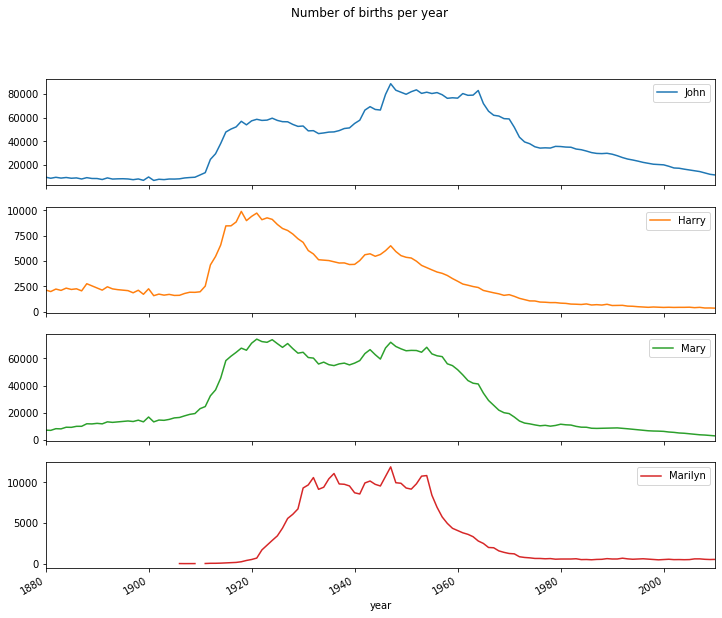

In [44]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title="Number of births per year")